DataFrame:
    Name  Delay  DynamicPower  Leakage  Area  PerformanceIndex  PowerDensity  \
0    ALU    0.9          0.45     0.05   1.8             0.450      0.277778   
1  CACHE    1.2          0.60     0.10   2.5             0.840      0.280000   
2    DSP    0.8          0.75     0.06   3.2             0.648      0.253125   
3     IO    1.5          0.30     0.02   1.0             0.480      0.320000   

   TimingViolation  
0            False  
1             True  
2            False  
3             True   

Mean Delay: 1.1
Max Power Density: 0.32 

Worst Block:
Name                CACHE
Delay                 1.2
DynamicPower          0.6
Leakage               0.1
Area                  2.5
PerformanceIndex     0.84
PowerDensity         0.28
TimingViolation      True
Name: 1, dtype: object 

CSV saved: chip_block_summary.csv
JSON saved: chip_block_report.json


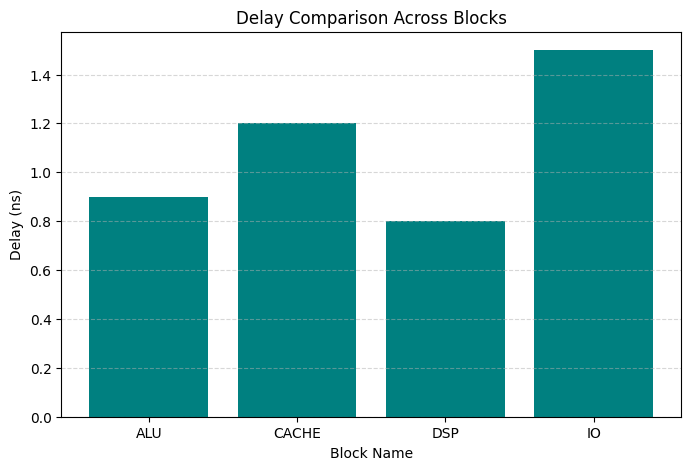

Delay plot saved: delay_plot.png


In [1]:
#VLSI block analyszer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# ---------------------------------------------------------
# 1. ChipBlock class
# ---------------------------------------------------------
class ChipBlock:
    def __init__(self, name, delay, dynamic_power, leakage, area):
        self.name = name
        self.delay = delay
        self.dynamic_power = dynamic_power
        self.leakage = leakage
        self.area = area

    # Performance index (lower = better)
    # Example formula: PI = delay * (dynamic_power + leakage)
    def performance_index(self):
        return self.delay * (self.dynamic_power + self.leakage)

    # Power density (W/mm^2)
    def power_density(self):
        return (self.dynamic_power + self.leakage) / self.area

    # Timing violation: delay > target?
    def has_timing_violation(self, target_delay=1.0):
        return self.delay > target_delay


# ---------------------------------------------------------
# 2. Example input data
# (You can replace this with file input or user input)
# ---------------------------------------------------------
input_data = [
    {"name": "ALU",    "delay": 0.9, "dynamic_power": 0.45, "leakage": 0.05, "area": 1.8},
    {"name": "CACHE",  "delay": 1.2, "dynamic_power": 0.60, "leakage": 0.10, "area": 2.5},
    {"name": "DSP",    "delay": 0.8, "dynamic_power": 0.75, "leakage": 0.06, "area": 3.2},
    {"name": "IO",     "delay": 1.5, "dynamic_power": 0.30, "leakage": 0.02, "area": 1.0},
]


# ---------------------------------------------------------
# 3. Convert input to ChipBlock objects
# ---------------------------------------------------------
blocks = [ChipBlock(**block) for block in input_data]


# ---------------------------------------------------------
# 4. Create Pandas DataFrame
# ---------------------------------------------------------
df = pd.DataFrame({
    "Name": [b.name for b in blocks],
    "Delay": [b.delay for b in blocks],
    "DynamicPower": [b.dynamic_power for b in blocks],
    "Leakage": [b.leakage for b in blocks],
    "Area": [b.area for b in blocks],
    "PerformanceIndex": [b.performance_index() for b in blocks],
    "PowerDensity": [b.power_density() for b in blocks],
    "TimingViolation": [b.has_timing_violation(1.0) for b in blocks]
})

print("DataFrame:")
print(df, "\n")


# ---------------------------------------------------------
# 5. NumPy computations
# ---------------------------------------------------------
mean_delay = np.mean(df["Delay"])
max_power_density = np.max(df["PowerDensity"])

print("Mean Delay:", mean_delay)
print("Max Power Density:", max_power_density, "\n")


# ---------------------------------------------------------
# 6. Identify worst block (highest performance index)
# ---------------------------------------------------------
worst_block = df.loc[df["PerformanceIndex"].idxmax()]

print("Worst Block:")
print(worst_block, "\n")


# ---------------------------------------------------------
# 7. Save summary CSV, JSON and generate bar plot
# ---------------------------------------------------------
df.to_csv("chip_block_summary.csv", index=False)
print("CSV saved: chip_block_summary.csv")

# Save JSON report
with open("chip_block_report.json", "w") as f:
    json.dump(df.to_dict(orient="records"), f, indent=4)

print("JSON saved: chip_block_report.json")

# Create bar plot of delay
plt.figure(figsize=(8, 5))
plt.bar(df["Name"], df["Delay"], color="teal")
plt.xlabel("Block Name")
plt.ylabel("Delay (ns)")
plt.title("Delay Comparison Across Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("delay_plot.png")
plt.show()

print("Delay plot saved: delay_plot.png")